In [54]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt
import glob
import os
import pandas as pd

from pyxlma.lmalib.io import read
from pyxlma.plot.xlma_plot_feature import color_by_time, plot_points, setup_hist, plot_3d_grid, subset
from pyxlma.plot.xlma_base_plot import subplot_labels, inset_view, BlankPlot
import matplotlib.dates as md

M2KM = 1000.0
xdiv = 0.01
ydiv = 0.01
zdiv = 0.1

%matplotlib inline

In [55]:
files_grabbed = sorted(glob.glob('../test/vanna/kinda/L*'))
lma_data, starttime = read.dataset(files_grabbed)
print(starttime)


lf = read.lmafile(files_grabbed[0])
# Station info comes from the last file read.
# stations = lma_file.stations

# Will need to add logic to check for existing data and do something else if it is
# if len(lma_data) > 0:
#     lma_data.sort_values('Datetime', inplace=True)
    
dttuple = [starttime, starttime+dt.timedelta(minutes=10)]
# dttuple = lma_data.Datetime.min(), lma_data.Datetime.max()
tstring = 'Oklahoma LMA {}-{}'.format(dttuple[0].strftime('%H%M'),
                                      dttuple[1].strftime('%H%M UTC %d %B %Y '))

2020-04-02 23:00:00


In [56]:
print(lma_data.event_chi2.attrs['valid_range'])
print(lma_data.event_stations.attrs['valid_range'])
print(lma_data.event_time.encoding)
print(lma_data)

[0.0, 5.0]
[6, 255]
{'units': 'seconds since 2020-04-02 00:00:00 +00:00'}
<xarray.Dataset>
Dimensions:                      (number_of_events: 35436, number_of_stations: 18)
Dimensions without coordinates: number_of_events, number_of_stations
Data variables:
    network_center_latitude      float64 35.28
    network_center_longitude     float64 -97.92
    network_center_altitude      float64 417.9
    station_latitude             (number_of_stations) float32 35.00434 ... 34.711586
    station_longitude            (number_of_stations) float32 -97.907295 ... -99.08027
    station_altitude             (number_of_stations) float32 346.0 ... 415.89996
    station_event_fraction       (number_of_stations) float32 66.71001 ... 96.81
    station_power_ratio          (number_of_stations) float32 1.9909999 ... 0.842
    event_latitude               (number_of_events) float32 35.37887 ... 35.386784
    event_longitude              (number_of_events) float32 -99.74041 ... -99.712746
    event_alti

In [57]:
try:
    alt_data = lma_data.event_altitude.values/M2KM
    lon_data = lma_data.event_longitude.values
    lat_data = lma_data.event_latitude.values
    time_data = pd.Series(lma_data.event_time) # because time comparisons
    chi_data = lma_data.event_chi2.values
# # Or the pandas version
# try:
#     alt_data = lma_data['alt(m)']/M2KM
#     lon_data = lma_data.lon
#     lat_data = lma_data.lat
#     time_data = lma_data.Datetime
#     chi_data = lma_data['reduced chi^2']
except:
    alt_data = np.array([])
    lon_data = np.array([])
    lat_data = np.array([])
    time_data = np.array([])
    chi_data = np.array([])

In [58]:
plot_cmap = 'plasma'
plot_s = 5

# Make subset here / set defaults?
tlim = [starttime, starttime + dt.timedelta(minutes=10)]

clat, clon = 35.26707931, -97.73839823
xlim = [clon-3.1, clon+3.1]
ylim = [clat-3.1, clat+3.1]
zlim = [0, 21]
xchi = 1

lon_set, lat_set, alt_set, time_set, selection = subset(lon_data, lat_data, alt_data, time_data, chi_data,
           xlim, ylim, zlim, tlim, xchi)

/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


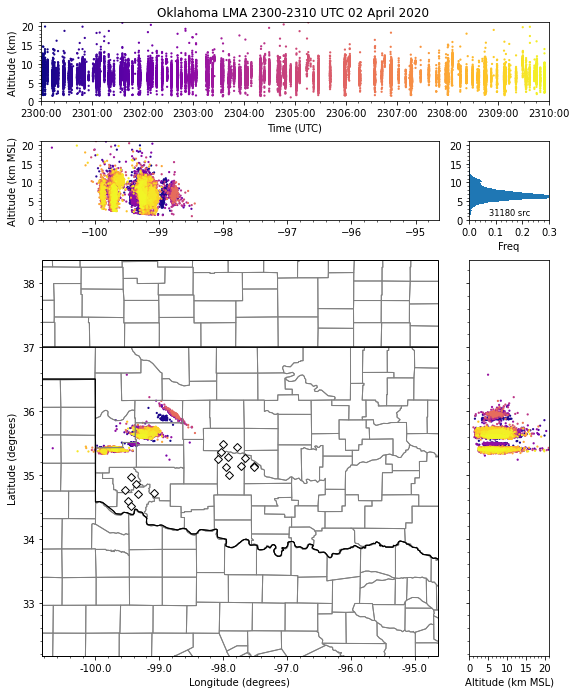

In [59]:
bk_plot = BlankPlot(tlim[0],bkgmap=True, 
              xlim=xlim, ylim=ylim, zlim=zlim, tlim=tlim, title=tstring)

# Add stations
stn_art = bk_plot.ax_plan.plot(lma_data['station_longitude'], 
                               lma_data['station_latitude'], 'wD', mec='k', ms=5)

if len(lon_set)==0:
    # If there is no data in the subset add "No Sources" to histogram panel
    bk_plot.ax_hist.text(0.02,1,'No Sources',fontsize=12)
else:
    # If there is data generate a by-time color map and plot the points
    plot_vmin, plot_vmax, plot_c = color_by_time(time_set, tlim)
    plot_points(bk_plot, lon_set, lat_set, alt_set, time_set,
                      plot_cmap, plot_s, plot_vmin, plot_vmax, plot_c)

plt.show()
# plt.savefig('./images/' + dttuple[0].strftime('%y%m%d') +
#             '/relampago_points_' + dttuple[0].strftime('%Y%m%d_%H%M.png'))

In [60]:
tdiv = 300
xbins = np.arange(xlim[0],xlim[1]+xdiv,xdiv)
ybins = np.arange(ylim[0],ylim[1]+ydiv,ydiv)
zbins = np.arange(zlim[0],zlim[1]+zdiv,zdiv)
tbins = np.linspace(md.date2num(tlim)[0],md.date2num(tlim)[1],tdiv)

/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


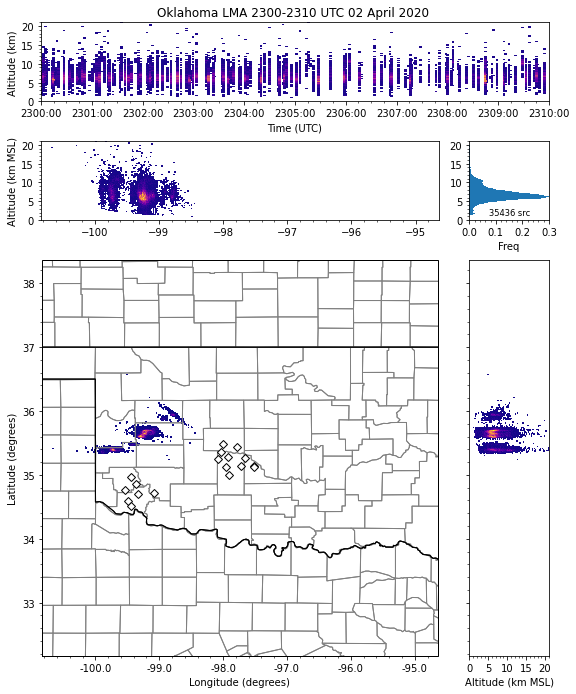

In [61]:
bk_plot = BlankPlot(tlim[0],bkgmap=True,
              zlim=zlim, tlim=tlim, 
              xlim=xlim, ylim=ylim, title=tstring)

# Add stations
stn_art = bk_plot.ax_plan.plot(lma_data['station_longitude'], 
                               lma_data['station_latitude'], 'wD', mec='k', ms=5)

if len(lon_set)==0:
    bk_plot.ax_hist.text(0.02,1,'No Sources',fontsize=12)
else:
    alt_lon, alt_lat, alt_time, lat_lon = setup_hist(lon_set, lat_set, alt_set, time_set,
                   xbins, ybins, zbins, tbins)
    plot_3d_grid(bk_plot, xbins, ybins, zbins, tbins,
                  alt_lon, alt_lat, alt_time, lat_lon, alt_data, plot_cmap)

plt.show()

### Subset example

/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:631: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x11aa699a0> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


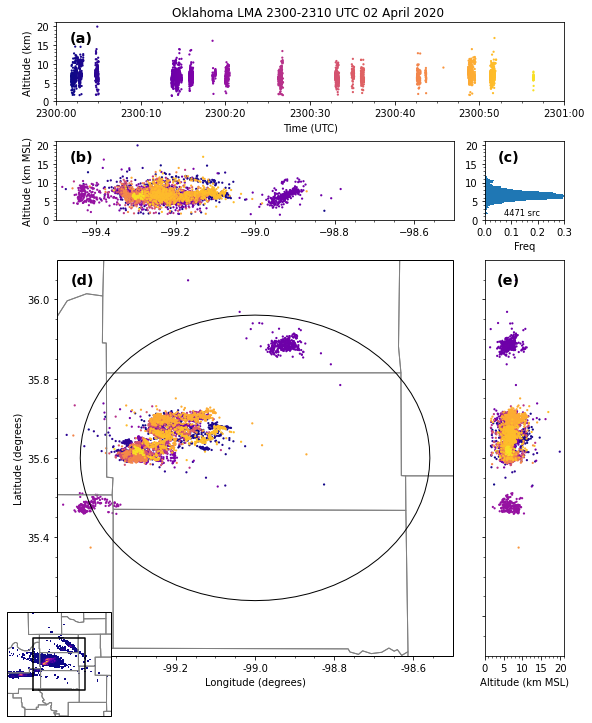

In [62]:
# Make subset here / set defaults?
tlim = [starttime, starttime + dt.timedelta(minutes=1)]

clat, clon = 35.6, -99
xlim = [clon-0.5, clon+0.5]
ylim = [clat-0.5, clat+0.5]
zlim = [0, 21]
xchi = 1

lon_set, lat_set, alt_set, time_set, selection = subset(
           lon_data, lat_data, alt_data, time_data, chi_data,
           xlim, ylim, zlim, tlim, xchi)

bk_plot = BlankPlot(tlim[0],bkgmap=True, 
              xlim=xlim, ylim=ylim, zlim=zlim, tlim=tlim_sub, title=tstring)

# Add a view of where the subset is
inset_view(bk_plot, lon_data, lat_data, xlim, ylim, xdiv, ydiv,
          buffer=0.5, inset_size=0.15, plot_cmap = 'plasma', bkgmap = True)
# Add some subplot labels
subplot_labels(bk_plot)
# Add a range ring
bk_plot.ax_plan.tissot(rad_km=40.0, lons=clon, lats=clat, n_samples=80,
                  facecolor='none',edgecolor='k')
# Add the station locations
stn_art = bk_plot.ax_plan.plot(lma_data['station_longitude'], 
                               lma_data['station_latitude'], 'wD', mec='k', ms=5)

if len(lon_set)==0:
    bk_plot.ax_hist.text(0.02,1,'No Sources',fontsize=12)
else:
    plot_vmin, plot_vmax, plot_c = color_by_time(time_set, tlim)
    plot_points(bk_plot, lon_set, lat_set, alt_set, time_set,
                      plot_cmap, plot_s, plot_vmin, plot_vmax, plot_c)

plt.show()
# plt.savefig('./images/' + dttuple[0].strftime('%y%m%d') +
#             '/relampago_points_' + dttuple[0].strftime('%Y%m%d_%H%M.png'))

## Other tests

### Pandas reader handling

In [ ]:
files_grabbed = sorted(glob.glob('../test/vanna/not/L*'))
lma_data = pd.DataFrame()

for i in range(10):
    # print (sorted(files_grabbed, key=os.path.getctime)[-(i+2)])
    lma_file = read.lmafile(sorted(files_grabbed, key=os.path.getctime)[-(i+1)])
    # Accounting for empty files
    try:
        lma_data = lma_data.append(lma_file.readfile())
    except:
        pass
    
stations = lma_file.stations

# Will need to add logic to check for existing data and do something else if it is
if lma_data.size>0:
    lma_data.sort_values('Datetime', inplace=True)

tstring = 'Oklahoma LMA {}-{}'.format(lma_file.starttime.strftime('%H%M'),(
lma_file.starttime+dt.timedelta(minutes=10)).strftime('%H%M UTC %d %B %Y '))

### Time handling

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.2.1
module://ipykernel.pylab.backend_inline


In [8]:
t = np.array(['2020-04-02T23:00:00.749079563', '2020-04-02T23:00:00.749083039',
              '2020-04-02T23:00:01.792519894', '2020-04-02T23:00:01.793246307',
              '2020-04-02T23:00:01.793248355', '2020-04-02T23:00:01.795347666',
              '2020-04-02T23:00:01.796964828', '2020-04-02T23:00:01.798717183',
              '2020-04-02T23:00:01.800349212', '2020-04-02T23:00:01.801143192'],
      dtype='datetime64[ns]')
tlim = np.array(['2020-04-02T23:00:00', '2020-04-02T23:00:02'],
      dtype='datetime64[ns]')
z = np.arange(t.shape[0], dtype=float)

(737517.9583333334, 737517.9583564815)

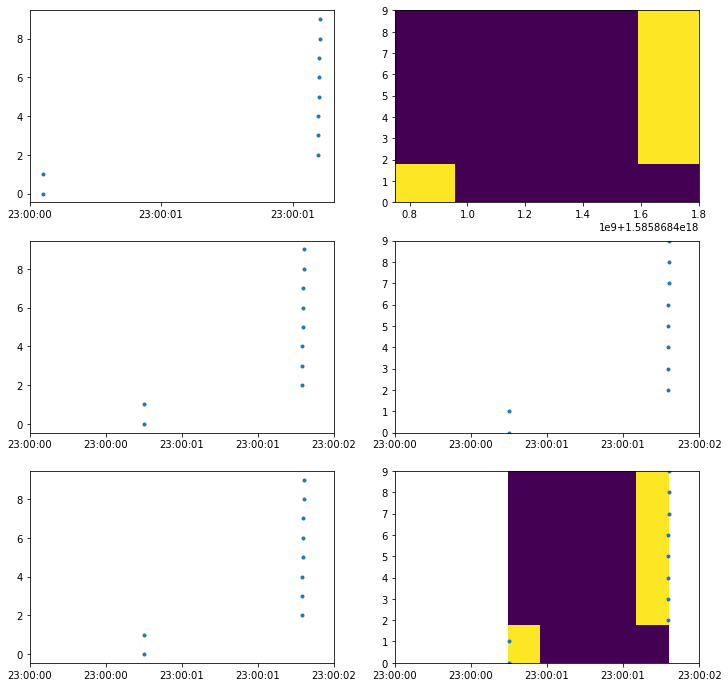

In [9]:
fig, ax = plt.subplots(3,2, figsize=(12,12))
# plot with no axis control
ax[0,0].plot(t, z, '.')
ax[0,1].hist2d(t, z, bins=[5, 5])

# set axes to expected range with default time handling
# plot works, hist2d doesnt.
ax[1,0].plot(t, z, '.')
ax[1,0].set_xlim(tlim[0], tlim[1])
ax[1,1].hist2d(t, z, bins=[5, 5])
ax[1,1].plot(t, z, '.')
ax[1,1].set_xlim(tlim[0], tlim[1])

# manually converting dates fixes hist2d
ax[2,0].plot(t, z, '.')
ax[2,0].set_xlim(tlim[0], tlim[1])

ax[2,1].hist2d(matplotlib.dates.date2num(t), z, bins=[5, 5])
ax[2,1].plot(t, z, '.')
ax[2,1].set_xlim(tlim[0], tlim[1])